<a href="https://colab.research.google.com/github/sai-krishna-dalai-333/AI-ML/blob/main/house_price_prediction_with_regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#load the entire dataset split to test and train
train = pd.read_csv('/train.csv')
test = pd.read_csv('/test.csv')

train.shape, test.shape

((1460, 81), (1459, 80))

# **Preparing the Data**

here i'm analyszing the entire data and finding the number of null values in the datset

In [ ]:
#concat the test and train to single dataset
df=pd.concat([train,test])
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [ ]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [ ]:
dnull=df.isnull().sum()
dnull

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#visualization 

# **VISUALIZATION**

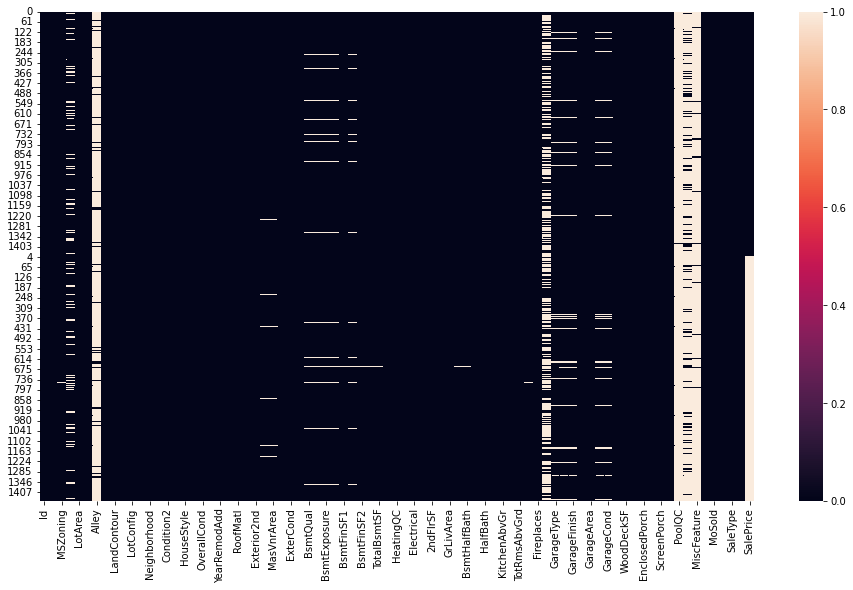

In [ ]:
#to identify the place of nulls
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


**Here, i find all the columns with null values.
Now i'm going to fill all the colums of null values with other value**

In [ ]:
nan_cols = [i for i in df.columns if df[i].isnull().any()]
nan_cols

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SalePrice']

In [ ]:
df['LotFrontage'].fillna(np.mean(df['LotFrontage']), inplace=True) #it is a numerical attribute so we can fill with mean of it

In [ ]:
dnull=df.isnull().sum()
dnull 

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage         0
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

In [ ]:
df['BsmtQual'].fillna(df['BsmtQual'].mode()[0], inplace=True)
df['BsmtCond'].fillna(df['BsmtCond'].mode()[0], inplace=True)
df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0], inplace=True)
df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0], inplace=True)
df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0], inplace=True)
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)
    


In [ ]:
dnull=df.isnull().sum()
dnull

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage         0
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

In [ ]:
df['GarageType'].fillna('No',inplace=True) # fill no that doens't have any garage type
df['GarageYrBlt'].fillna(0,inplace=True) # fill 0 that doesn't have any garage yr build because they don't have any garage
df['GarageFinish'].fillna('No',inplace=True)
df['GarageQual'].fillna('No',inplace=True) 

In [ ]:
dnull=df.isnull().sum()
dnull

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage         0
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

In [ ]:
nan_cols = [i for i in df.columns if df[i].isnull().any()]
nan_cols

['MSZoning',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageCars',
 'GarageArea',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SalePrice']

In [ ]:
df['MSZoning'].fillna(df['MSZoning'].mode()[0], inplace=True)
df['Utilities'].fillna(df['Utilities'].mode()[0], inplace=True)
df['Exterior1st'].fillna(df['Exterior1st'].mode()[0], inplace=True)
df['BsmtFinSF1'].fillna(df['BsmtFinSF1'].mean(), inplace=True)
df['BsmtFinSF2'].fillna(df['BsmtFinSF2'].mean(), inplace=True)
df['BsmtUnfSF'].fillna(df['BsmtUnfSF'].mean(), inplace=True)
df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].mean(), inplace=True)
df['BsmtFullBath'].fillna(df['BsmtFullBath'].mode()[0], inplace=True)
df['BsmtHalfBath'].fillna(df['BsmtHalfBath'].mode()[0], inplace=True)
df['KitchenQual'].fillna(df['KitchenQual'].mode()[0], inplace=True)
df['Functional'].fillna(df['Functional'].mode()[0], inplace=True)
df['GarageCars'].fillna(df['GarageCars'].mode()[0], inplace=True)
df['GarageArea'].fillna(df['GarageArea'].mean(), inplace=True)
df['SaleType'].fillna(df['SaleType'].mode()[0], inplace=True)

In [ ]:
dnull=df.isnull().sum()
dnull

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

In [ ]:
nan_cols = [i for i in df.columns if df[i].isnull().any()]
nan_cols

['Alley',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'FireplaceQu',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SalePrice']

In [ ]:
df['MasVnrType'] 


0       BrkFace
1          None
2       BrkFace
3          None
4       BrkFace
         ...   
1454       None
1455       None
1456       None
1457       None
1458    BrkFace
Name: MasVnrType, Length: 2919, dtype: object

In [ ]:
df['MasVnrArea']

0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
1454      0.0
1455      0.0
1456      0.0
1457      0.0
1458     94.0
Name: MasVnrArea, Length: 2919, dtype: float64

In [ ]:
#MasVnrArea is the float type
df['MasVnrArea'].fillna(np.mean(df['MasVnrArea']), inplace=True)

In [ ]:
df['FireplaceQu']

0       NaN
1        TA
2        TA
3        Gd
4        TA
       ... 
1454    NaN
1455    NaN
1456     TA
1457    NaN
1458     TA
Name: FireplaceQu, Length: 2919, dtype: object

In [ ]:
df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0], inplace=True)

In [ ]:
s=set(df.select_dtypes(include=['int64','float64']).columns)
ints=s.intersection(set(nan_cols))
print(ints)

{'MasVnrArea', 'SalePrice'}


In [ ]:
print(nan_cols)
#nan_cols.remove('SalePrice')
nan_cols.remove('MasVnrArea')
nan_cols

['Alley', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'FireplaceQu', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SalePrice']


['Alley',
 'Exterior2nd',
 'MasVnrType',
 'FireplaceQu',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SalePrice']

In [ ]:
for i in nan_cols:
    df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0], inplace=True)
    

In [ ]:
dn=df.isnull().sum()
dn

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

#**Except the output variable i preprocess the all attributes
So the process pre-process with data analysing is completed
 Now i need to Model the data**#

# **MODEL BUILDING**

In [ ]:
df.shape

(2919, 81)

**Split the entire data into train and test data**
**Based on the Training we ned to predict the SalePrice value**

In [ ]:
df['SalePrice'].fillna(np.mean(df['SalePrice']), inplace=True)

**Required to cahge the catagorical value to Numerical value for the purpose of Regression**

In [ ]:
object_columns = df.select_dtypes(include=['object']).columns
object_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
for i in object_columns:
    df = pd.get_dummies(df, columns=[i])

In [ ]:
x_train=df[:2000]
y_train=df.SalePrice[:2000]
x_test=df[2000:]
y_test=df.SalePrice[2000:]

In [ ]:
df.SalePrice

0       208500.00000
1       181500.00000
2       223500.00000
3       140000.00000
4       250000.00000
            ...     
1454    180921.19589
1455    180921.19589
1456    180921.19589
1457    180921.19589
1458    180921.19589
Name: SalePrice, Length: 2919, dtype: float64

# Linear Regression

In [ ]:
from sklearn import*
#from sklearn import datasets, linear_model
l = linear_model.LinearRegression()
l.fit(x_train,y_train)
from sklearn.metrics import mean_squared_error, r2_score,make_scorer
y_pred = l.predict(x_test)
print(f"Mean squared error: { mean_squared_error(y_test, y_pred)} %" ,)



Mean squared error: 1.225570957523442e-20 %


# **Decision Tree Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print(f"Mean squared error with decision tree Regressor is : { mean_squared_error(y_test, y_pred)} %" ,)

Mean squared error with decision tree Regressor is : 4.87890977618477e-19 %


# **Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state=51)
#test_model(rf_reg)
rf.fit(x_train, y_train) 
y_pred = rf.predict(x_test)
print(f"Mean squared error with Random forest Regressor is : { mean_squared_error(y_test, y_pred)} %" ,)



Mean squared error with Random forest Regressor is : 8.306937594468355 %


# **XG Boost**

In [ ]:
import xgboost

xgb = xgboost.XGBRegressor()
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
print(f"Mean squared error with XGBoost Regressor is : { mean_squared_error(y_test, y_pred)} %" ,)



[17:47:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean squared error with XGBoost Regressor is : 9188.127782972366 %
